# Partie 2 du Tp1

On considère la base de formes MPEG-7 qui comprend 70 types d'objets ayant chacun 20 formes  différentes(1400  formes).Chaque  forme  contour  a  été  reparamétré  par  l’abscisse curviligne. Lefichier «MPEG-7_arc_length parametrization.csv» comprend la liste des 1400 formes contours reparamétrés. 

## Question 1
Implémenter les descripteurs de Fourier vus en cours(penser à utiliser la fonction Discrete Fourier Transform (numpy.fft)de numpy)

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [24]:
# Charger le fichier CSV
df = pd.read_csv('C:\\Users\\Nathan\\Documents\\Projet\\Reconnaissance de formes et apprentissage machine\\TP\\TP1\\MPEG-7_data_arc_length parametrization.csv')

# Afficher les premières lignes du DataFrame
print(df.head())

original_contour = df.iloc[0].values

   36.0  0.024741445824742147  0.02528817143247913  0.026839037670761748  \
0  28.0              0.026832             0.029665              0.033134   
1  64.0              0.153116             0.149536              0.143248   
2  32.0              0.144998             0.142614              0.140184   
3  52.0              0.152741             0.151036              0.148942   
4  64.0              0.144692             0.143095              0.141414   

   0.029287233907614892  0.032293621300270144  0.036538891333856995  \
0              0.036498              0.039899              0.043431   
1              0.133658              0.122524              0.112735   
2              0.138075              0.136607              0.136053   
3              0.146835              0.144867              0.142384   
4              0.138378              0.133119              0.127074   

   0.04164106022283736  0.047394955001835326  0.053728161683071145  ...  \
0             0.047412              0.051

In [25]:
def fourier_descriptors(contour):
    # Calculer la transformée de Fourier discrète
    fourier_transform = np.fft.fft(contour)

    # Ignorer le premier descripteur pour l'invariance à la translation
    fourier_transform = fourier_transform[1:]

    # Utiliser le module pour l'invariance à la rotation
    fourier_transform = np.abs(fourier_transform)

    # Normaliser pour l'invariance à l'échelle
    fourier_transform = fourier_transform / fourier_transform[0]

    # Retourner les descripteurs de Fourier
    return fourier_transform

## Question 2

Vérifier les propriétés de ces descripteurs

In [26]:
# Calculer les descripteurs de Fourier du contour original
original_descriptors = fourier_descriptors(original_contour)

tolerance = 1e-8  # Définir la tolérance

# Déplacer, faire pivoter et redimensionner le contour
translated_contour = original_contour + 10
rotated_contour = np.roll(original_contour, 1)
rescaled_contour = original_contour * 2

# Calculer les descripteurs de Fourier des contours modifiés
translated_descriptors = fourier_descriptors(translated_contour)
rotated_descriptors = fourier_descriptors(rotated_contour)
rescaled_descriptors = fourier_descriptors(rescaled_contour)

# Vérifier les propriétés d'invariance avec la tolérance
print("Invariance a la translation : ", np.allclose(original_descriptors[1:], translated_descriptors[1:], atol=tolerance))
print("Invariance a la rotation : ", np.allclose(np.abs(original_descriptors[1:]), np.abs(rotated_descriptors[1:]), atol=tolerance))
print("Invariance a l'echelle : ", np.allclose(original_descriptors[1:] / original_descriptors[1], rescaled_descriptors[1:] / rescaled_descriptors[1], atol=tolerance))

Invariance a la translation :  True
Invariance a la rotation :  True
Invariance a l'echelle :  True


## Question 3

Évaluerla performance d’un système de recherche se basant sur ces descripteursen traçantla courbe Précision en fonction du Rappel(vous pouvez utiliser la fonction sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

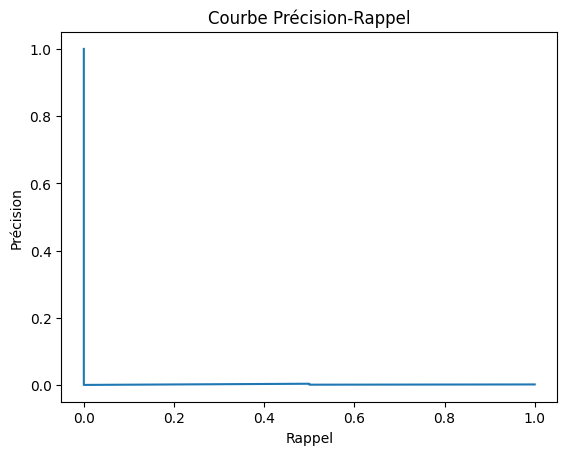

In [27]:
# Définir les étiquettes de classe réelles
# Ici, nous supposons que les deux premiers contours appartiennent à la même classe (étiquette 1), et les autres à une autre classe (étiquette 0)
y_true = np.array([1, 1] + [0] * (len(df) - 2))

# Calculer les scores de prédiction en utilisant une mesure de distance
# Ici, nous utilisons la distance euclidienne entre les descripteurs de Fourier du contour original et ceux des autres contours
y_scores = np.array([np.linalg.norm(fourier_descriptors(df.iloc[i].values)[1:] - original_descriptors[1:]) for i in range(len(df))])

# Calculer la précision et le rappel pour différents seuils
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Tracer la courbe Précision-Rappel
plt.plot(recall, precision)
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.show()